<a href="https://colab.research.google.com/github/Alan240124/Alan/blob/main/Atividade_M%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanIoU

# Função para carregar o dataset
def load_data(images_path, masks_path, img_size=(128, 128)):
    images = []
    masks = []

    for img_name in sorted(os.listdir(images_path)):
        img = tf.keras.preprocessing.image.load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        mask = tf.keras.preprocessing.image.load_img(os.path.join(masks_path, mask_name), color_mode='grayscale', target_size=img_size)
        mask = tf.keras.preprocessing.image.img_to_array(mask) / 255.0
        masks.append(mask)

    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)

    return train_test_split(images, masks, test_size=0.2, random_state=42)

# Função para definir o modelo CNN
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')
    ])
    return model

# Criar a métrica MeanIoU fora da função iou_metric
metric = MeanIoU(num_classes=2)

# Função de métrica personalizada (usando MeanIoU)
def iou_metric(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    metric.update_state(y_true, y_pred)
    return metric.result()

# Função para monitorar o treinamento
def get_callbacks():
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    return [early_stopping]

# Função principal de treinamento
def main(images_path, masks_path):
    # Carregar dados
    X_train, X_val, y_train, y_val = load_data(images_path, masks_path)

    # Definir modelo
    input_shape = X_train.shape[1:]
    model = create_cnn_model(input_shape)

    # Compilar modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[iou_metric])

    # Treinar modelo
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=8,
                        callbacks=get_callbacks())

    # Avaliar o modelo
    val_loss, val_iou = model.evaluate(X_val, y_val)
    print(f"Validation IoU: {val_iou:.4f}")

    return model, history

# Caminhos para as pastas de imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'
masks_path = '/content/drive/MyDrive/DataSet3/masks'

# Executar o treinamento
if __name__ == "__main__":
    model, history = main(images_path, masks_path)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - iou_metric: 0.2913 - loss: 0.6930 - val_iou_metric: 0.3315 - val_loss: 0.6910
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - iou_metric: 0.3776 - loss: 0.6911 - val_iou_metric: 0.3886 - val_loss: 0.6880
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step - iou_metric: 0.4053 - loss: 0.6883 - val_iou_metric: 0.4105 - val_loss: 0.6832
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - iou_metric: 0.4180 - loss: 0.6837 - val_iou_metric: 0.4209 - val_loss: 0.6752
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - iou_metric: 0.4246 - loss: 0.6761 - val_iou_metric: 0.4264 - val_loss: 0.6632
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - iou_metric: 0.4280 - loss: 0.6650 - val_iou_metric: 0.4292 - val_loss: 0.6469
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - iou_metric: 0.4300 - loss: 0.6510 - val_iou_metric: 0.4309 - val_loss: 0.6292
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - iou_metric: 0.4311 - loss: 0.6392 - val_iou_metric: 0.4

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Função para monitorar o treinamento, incluindo decaimento e parada antecipada
def get_callbacks():
    # Parada antecipada
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Decaimento de taxa de aprendizado baseado na perda de validação
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    return [early_stopping, reduce_lr]


In [ ]:
def main(images_path, masks_path):
    # Carregar dados
    X_train, X_val, y_train, y_val = load_data(images_path, masks_path)

    # Definir modelo
    input_shape = X_train.shape[1:]
    model = create_cnn_model(input_shape)

    # Compilar modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[iou_metric])

    # Treinar modelo
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=8,
                        callbacks=get_callbacks())

    # Avaliar o modelo
    val_loss, val_iou = model.evaluate(X_val, y_val)
    print(f"Validation IoU: {val_iou:.4f}")

    return model, history


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Função para monitorar o treinamento, incluindo parada antecipada
def get_callbacks():
    # Parada antecipada
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    return [early_stopping]


In [ ]:
def main(images_path, masks_path):
    # Carregar dados
    X_train, X_val, y_train, y_val = load_data(images_path, masks_path)

    # Definir modelo
    input_shape = X_train.shape[1:]
    model = create_cnn_model(input_shape)

    # Compilar modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[iou_metric])

    # Treinar modelo
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=8,
                        callbacks=get_callbacks())

    # Avaliar o modelo
    val_loss, val_iou = model.evaluate(X_val, y_val)
    print(f"Validation IoU: {val_iou:.4f}")

    return model, history


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5157 - loss: 0.6926 - val_accuracy: 0.5900 - val_loss: 0.6904
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step - accuracy: 0.7098 - loss: 0.6877 - val_accuracy: 0.5900 - val_loss: 0.6866
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - accuracy: 0.7108 - loss: 0.6787 - val_accuracy: 0.5900 - val_loss: 0.6813
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.7108 - loss: 0.6620 - val_accuracy: 0.5900 - val_loss: 0.6794
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - accuracy: 0.7108 - loss: 0.6344 - val_accuracy: 0.5900 - val_loss: 0.7085
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.7108 - loss: 0.6024 - val_accuracy: 0.5900 - val_loss: 0.8535
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 0.7108 - loss: 0.6108 - val_accuracy: 0.5900 - val_loss: 0.8620
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - accuracy: 0.7108 - loss: 0.6044 - val_accuracy: 0.5900 - val_loss: 0.

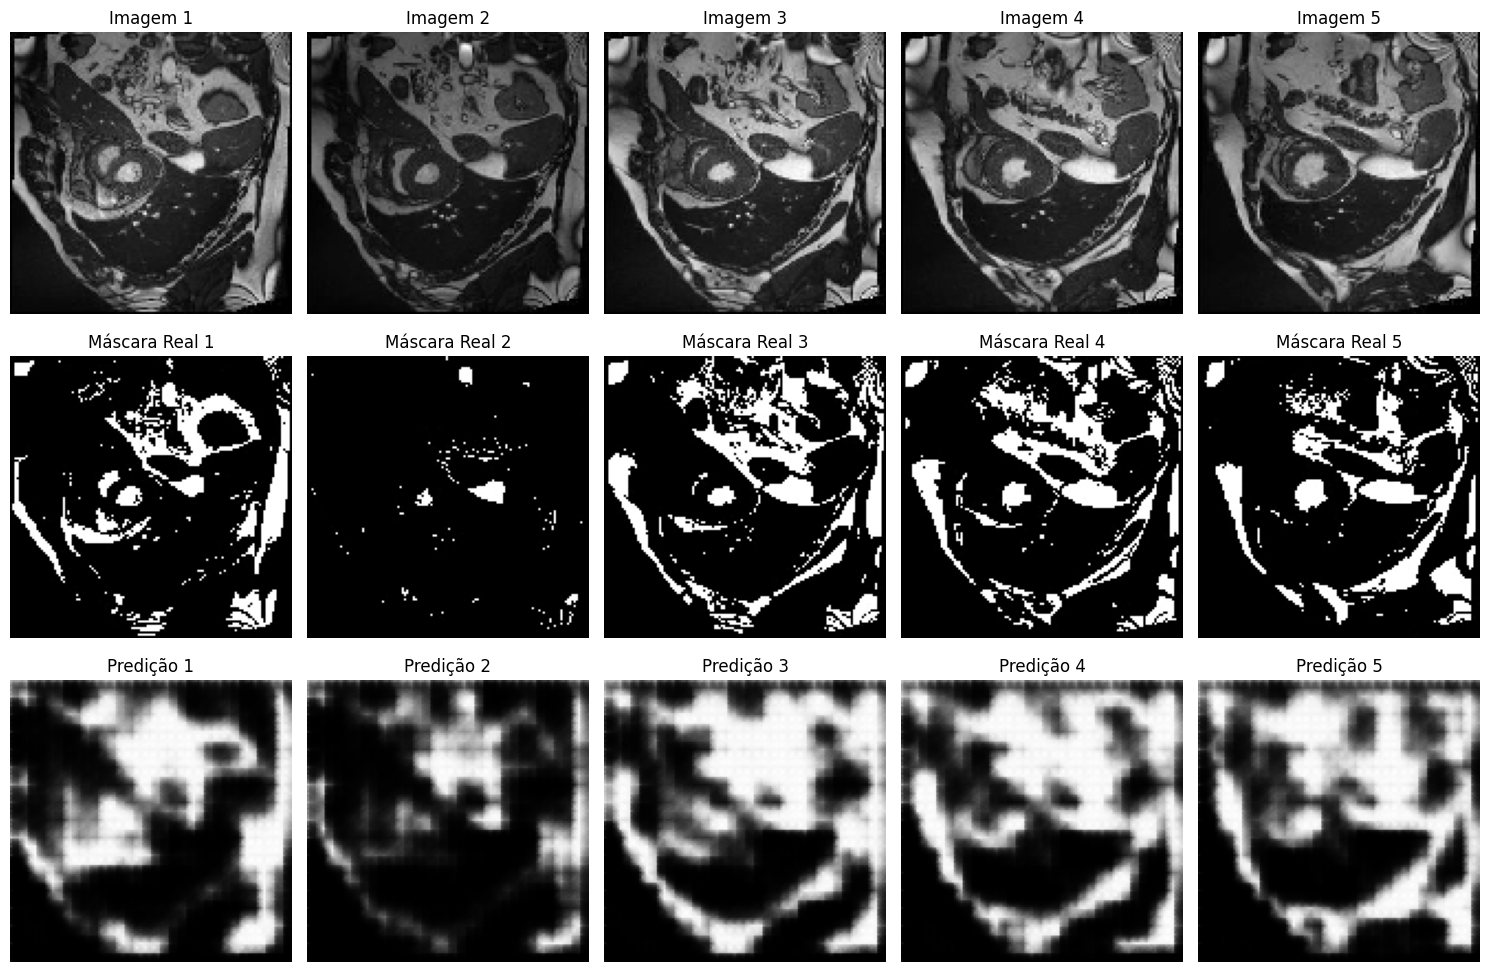

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Função para carregar e pré-processar os dados (imagens e máscaras)
def load_data(images_path, masks_path, img_size=(128, 128)):
    images = []
    masks = []

    # Carregar imagens e máscaras
    for img_name in sorted(os.listdir(images_path)):
        img = load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = img_to_array(img) / 255.0  # Normalizar
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        mask = load_img(os.path.join(masks_path, mask_name), color_mode='grayscale', target_size=img_size)
        mask = img_to_array(mask) / 255.0  # Normalizar
        masks.append(mask)

    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)

    return images, masks

# Função para definir o modelo CNN para segmentação
def create_cnn_model(input_shape):
    model = models.Sequential([
        # Camada Convolucional 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Camada Convolucional 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Camada Convolucional 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Camada de Decodificação (up-sampling)
        layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'),

        # Camada de Saída para segmentação (uma máscara binária)
        layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
    ])
    return model

# Função para compilar e treinar o modelo
def train_model(images_path, masks_path):
    # Carregar os dados
    X, y = load_data(images_path, masks_path)

    # Definir o modelo
    input_shape = X.shape[1:]
    model = create_cnn_model(input_shape)

    # Compilar o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    history = model.fit(X, y, batch_size=8, epochs=50, validation_split=0.2, verbose=1)

    # Avaliar o modelo
    val_loss, val_acc = model.evaluate(X, y)
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")

    return model, history

# Função para visualizar algumas previsões
def visualize_predictions(model, images_path, masks_path):
    X, y = load_data(images_path, masks_path)

    # Gerar previsões
    preds = model.predict(X[:5])  # Prever as primeiras 5 imagens

    # Plotar as imagens, as máscaras reais e as predições
    plt.figure(figsize=(15, 10))

    for i in range(5):
        plt.subplot(3, 5, i+1)
        plt.imshow(X[i])  # Exibir a imagem
        plt.axis('off')
        plt.title(f"Imagem {i+1}")

        plt.subplot(3, 5, i+6)
        plt.imshow(y[i].squeeze(), cmap='gray')  # Exibir a máscara real
        plt.axis('off')
        plt.title(f"Máscara Real {i+1}")

        plt.subplot(3, 5, i+11)
        plt.imshow(preds[i].squeeze(), cmap='gray')  # Exibir a máscara prevista
        plt.axis('off')
        plt.title(f"Predição {i+1}")

    plt.tight_layout()
    plt.show()

# Caminhos para as pastas de imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'
masks_path = '/content/drive/MyDrive/DataSet3/masks'

# Executar o treinamento
if __name__ == "__main__":
    model, history = train_model(images_path, masks_path)
    visualize_predictions(model, images_path, masks_path)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3135 - loss: 0.6937 - val_accuracy: 0.5900 - val_loss: 0.6919
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - accuracy: 0.7088 - loss: 0.6908 - val_accuracy: 0.5900 - val_loss: 0.6902
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7109 - loss: 0.6873 - val_accuracy: 0.5900 - val_loss: 0.6875
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7108 - loss: 0.6812 - val_accuracy: 0.5900 - val_loss: 0.6837
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7108 - loss: 0.6704 - val_accuracy: 0.5900 - val_loss: 0.6798
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7108 - loss: 0.6520 - val_accuracy: 0.5900 - val_loss: 0.6835
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - accuracy: 0.7108 - loss: 0.6247 - val_accuracy: 0.5900 - val_loss: 0.7270
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - accuracy: 0.7108 - loss: 0.5991 - val_accuracy: 0.5900 - val_loss: 0.8683
Epoch 9

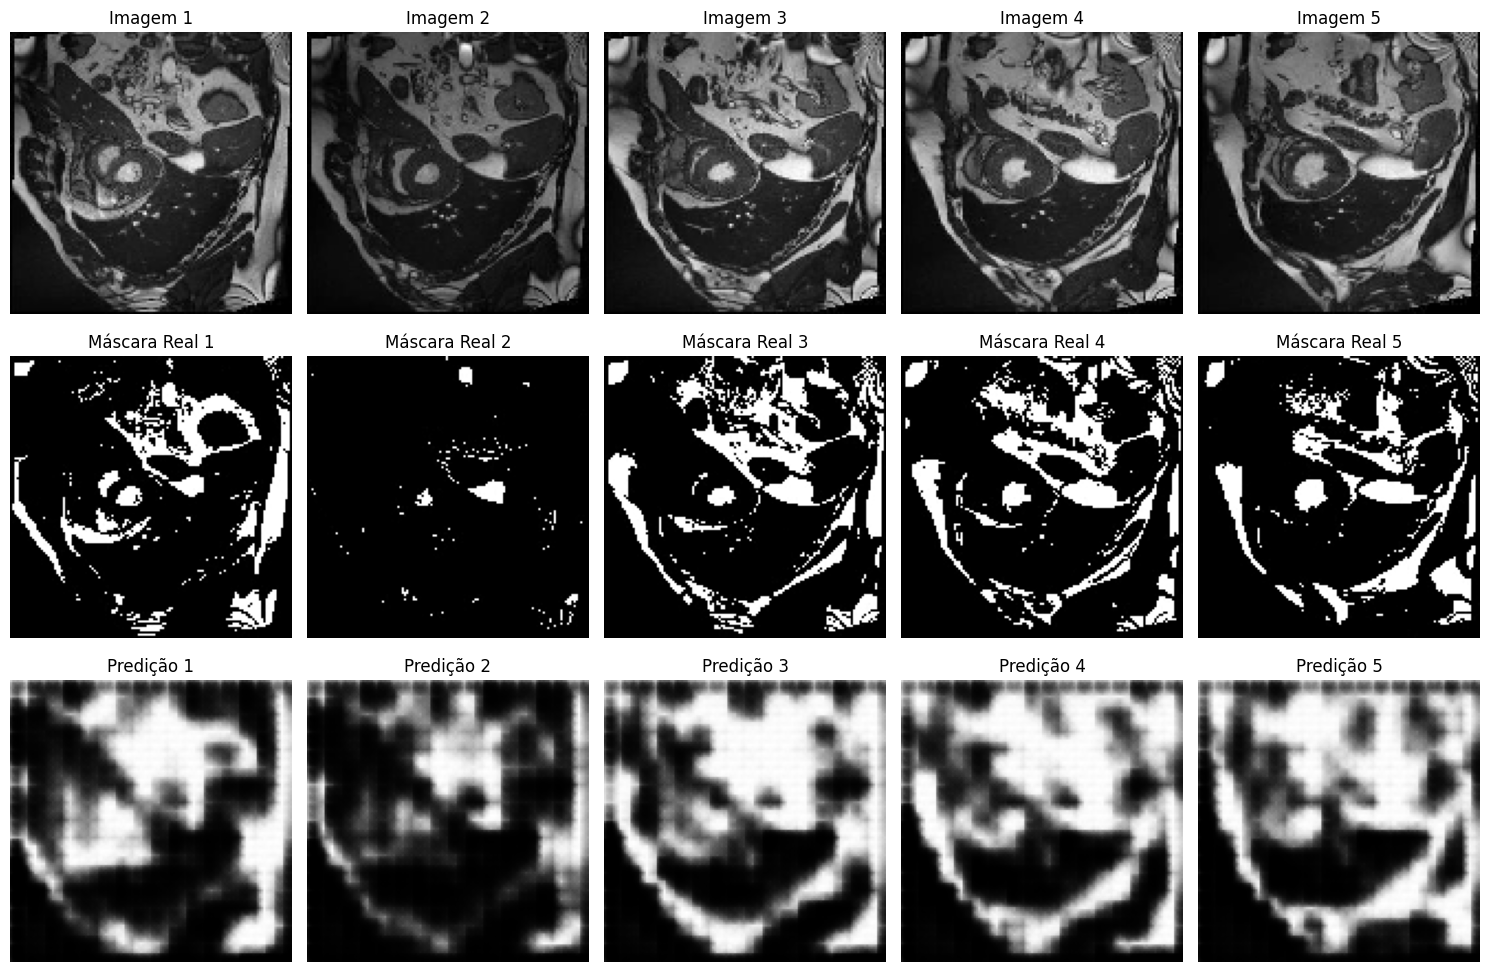

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Função para carregar e pré-processar os dados (imagens e máscaras)
def load_data(images_path, masks_path, img_size=(128, 128)):
    images = []
    masks = []

    # Carregar imagens e máscaras
    for img_name in sorted(os.listdir(images_path)):
        img = load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = img_to_array(img) / 255.0  # Normalizar
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        mask = load_img(os.path.join(masks_path, mask_name), color_mode='grayscale', target_size=img_size)
        mask = img_to_array(mask) / 255.0  # Normalizar
        masks.append(mask)

    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)

    return images, masks

# Função para definir o modelo CNN para segmentação
def create_cnn_model(input_shape):
    model = models.Sequential([
        # Camada Convolucional 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Camada Convolucional 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Camada Convolucional 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Camada de Decodificação (up-sampling)
        layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'),

        # Camada de Saída para segmentação (uma máscara binária)
        layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
    ])
    return model

# Função para treinar e avaliar o modelo
def train_and_evaluate_model(images_path, masks_path, img_size=(128, 128)):
    # Carregar os dados
    X, y = load_data(images_path, masks_path, img_size)

    # Definir o modelo
    input_shape = X.shape[1:]
    model = create_cnn_model(input_shape)

    # Compilar o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    history = model.fit(X, y, batch_size=8, epochs=50, validation_split=0.2, verbose=1)

    # Avaliar o modelo
    val_loss, val_acc = model.evaluate(X, y)
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")

    return model, history

# Função para visualizar algumas previsões
def visualize_predictions(model, images_path, masks_path, img_size=(128, 128)):
    X, y = load_data(images_path, masks_path, img_size)

    # Gerar previsões
    preds = model.predict(X[:5])  # Prever as primeiras 5 imagens

    # Plotar as imagens, as máscaras reais e as predições
    plt.figure(figsize=(15, 10))

    for i in range(5):
        plt.subplot(3, 5, i+1)
        plt.imshow(X[i])  # Exibir a imagem
        plt.axis('off')
        plt.title(f"Imagem {i+1}")

        plt.subplot(3, 5, i+6)
        plt.imshow(y[i].squeeze(), cmap='gray')  # Exibir a máscara real
        plt.axis('off')
        plt.title(f"Máscara Real {i+1}")

        plt.subplot(3, 5, i+11)
        plt.imshow(preds[i].squeeze(), cmap='gray')  # Exibir a máscara prevista
        plt.axis('off')
        plt.title(f"Predição {i+1}")

    plt.tight_layout()
    plt.show()

# Função principal para executar o treinamento, avaliação e visualização
def main():
    # Caminhos para as pastas de imagens e máscaras
    images_path = '/content/drive/MyDrive/DataSet3/images'  # Substitua pelo caminho da sua pasta de imagens
    masks_path = '/content/drive/MyDrive/DataSet3/masks'    # Substitua pelo caminho da sua pasta de máscaras

    # Treinar e avaliar o modelo
    model, history = train_and_evaluate_model(images_path, masks_path)

    # Visualizar as previsões do modelo
    visualize_predictions(model, images_path, masks_path)

if __name__ == "__main__":
    main()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4534 - loss: 0.6930
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step - accuracy: 0.6863 - loss: 0.6907
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 0.6967 - loss: 0.6866
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.6532 - loss: 0.6812
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - accuracy: 0.6865 - loss: 0.6687
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step - accuracy: 0.6948 - loss: 0.6461
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - accuracy: 0.6911 - loss: 0.6240
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step - accuracy: 0.6824 - loss: 0.6348
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step - accuracy: 0.6948 - loss: 0.6116
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step - accuracy: 0.6532 - loss: 0.6377
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


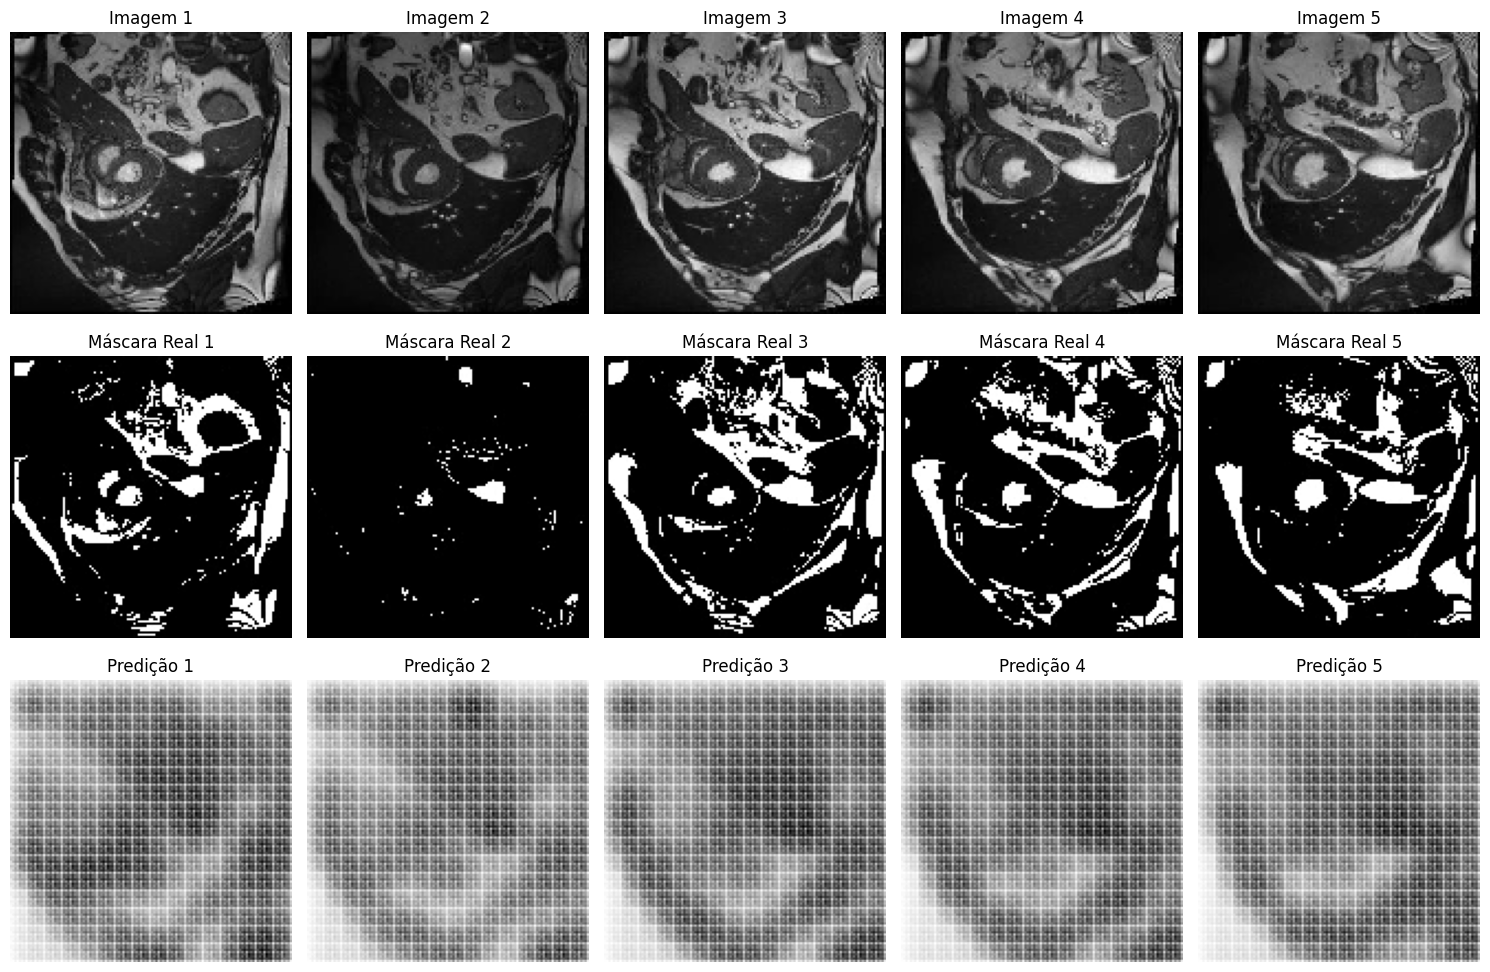

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Função para carregar e pré-processar as imagens e máscaras
def data(images_path, masks_path, img_size=(128, 128)):
    """
    Carrega e pré-processa as imagens e máscaras para segmentação.

    Parameters:
    - images_path: Caminho das imagens.
    - masks_path: Caminho das máscaras.
    - img_size: Tamanho de redimensionamento das imagens.

    Returns:
    - images: Numpy array com as imagens carregadas e normalizadas.
    - masks: Numpy array com as máscaras carregadas e normalizadas.
    """

    images = []
    masks = []

    for img_name in sorted(os.listdir(images_path)):
        # Carregar a imagem
        img = load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = img_to_array(img) / 255.0  # Normalizar a imagem
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        # Carregar a máscara
        mask = load_img(os.path.join(masks_path, mask_name), color_mode='grayscale', target_size=img_size)
        mask = img_to_array(mask) / 255.0  # Normalizar a máscara
        masks.append(mask)

    # Converter para numpy arrays
    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)

    # Adicionar a dimensão extra para a máscara (se necessário)
    if len(masks.shape) == 3:
        masks = np.expand_dims(masks, axis=-1)

    return images, masks

# DataLoader para carregar o dataset em lotes
class SegmentationDataLoader(Sequence):
    def __init__(self, images_path, masks_path, batch_size=8, img_size=(128, 128), shuffle=True):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle

        self.images, self.masks = data(images_path, masks_path, img_size)
        self.indices = np.arange(len(self.images))
        self.on_epoch_end()  # Embaralhar os dados inicialmente

    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = self.images[batch_indices]
        batch_masks = self.masks[batch_indices]
        return batch_images, batch_masks

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# Função para definir o modelo CNN de segmentação
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'),

        layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
    ])
    return model

# Função para treinar o modelo
def train_and_evaluate_model(images_path, masks_path, img_size=(128, 128), batch_size=8, epochs=50):
    # Criar o DataLoader
    train_loader = SegmentationDataLoader(images_path, masks_path, batch_size=batch_size, img_size=img_size)

    # Definir o modelo
    input_shape = (img_size[0], img_size[1], 3)  # 3 canais para RGB
    model = create_cnn_model(input_shape)

    # Compilar o modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Treinamento
    history = model.fit(train_loader, epochs=epochs)

    return model, history

# Função para visualizar as previsões
def visualize_predictions(model, images_path, masks_path, img_size=(128, 128)):
    # Carregar as primeiras 5 imagens e máscaras
    images, masks = data(images_path, masks_path, img_size)

    # Prever as máscaras para as primeiras 5 imagens
    preds = model.predict(images[:5])

    plt.figure(figsize=(15, 10))

    for i in range(5):
        plt.subplot(3, 5, i+1)
        plt.imshow(images[i])
        plt.title(f"Imagem {i+1}")
        plt.axis('off')

        plt.subplot(3, 5, i+6)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title(f"Máscara Real {i+1}")
        plt.axis('off')

        plt.subplot(3, 5, i+11)
        plt.imshow(preds[i].squeeze(), cmap='gray')
        plt.title(f"Predição {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Função principal para treinar, avaliar e visualizar o modelo
def main():
    # Caminhos para as pastas de imagens e máscaras
    images_path = '/content/drive/MyDrive/DataSet3/images'  # Substitua pelo caminho da sua pasta de imagens
    masks_path = '/content/drive/MyDrive/DataSet3/masks'    # Substitua pelo caminho da sua pasta de máscaras

    # Treinamento e avaliação
    model, history = train_and_evaluate_model(images_path, masks_path, img_size=(128, 128), batch_size=8, epochs=10)

    # Visualizar as previsões
    visualize_predictions(model, images_path, masks_path, img_size=(128, 128))

if __name__ == "__main__":
    main()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Caminhos das imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'   # Altere para o caminho correto das suas imagens
masks_path = '/content/drive/MyDrive/DataSet3/masks'     # Altere para o caminho correto das suas máscaras

# Parâmetros do modelo
img_size = (128, 128)
batch_size = 8
epochs = 5
patience = 5

# Função de carregamento dos dados
def load_data(images_path, masks_path, img_size):
    images = []
    masks = []
    for img_name in sorted(os.listdir(images_path)):
        img = tf.keras.preprocessing.image.load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        mask = tf.keras.preprocessing.image.load_img(os.path.join(masks_path, mask_name), target_size=img_size, color_mode="grayscale")
        mask = (tf.keras.preprocessing.image.img_to_array(mask) / 255.0).astype(np.uint8)  # Binário 0 e 1
        masks.append(mask)

    return np.array(images), np.array(masks)

# Carregar as imagens e máscaras
images, masks = load_data(images_path, masks_path, img_size)

# Dividir os dados em treinamento e validação
split = int(0.8 * len(images))
train_images, val_images = images[:split], images[split:]
train_masks, val_masks = masks[:split], masks[split:]

# Data Augmentation
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Função de gerador para imagens e máscaras
def data_generator(image_datagen, mask_datagen, images, masks, batch_size):
    image_generator = image_datagen.flow(images, batch_size=batch_size, seed=1)
    mask_generator = mask_datagen.flow(masks, batch_size=batch_size, seed=1)
    while True:
        yield (next(image_generator), next(mask_generator))

train_generator = data_generator(image_datagen, mask_datagen, train_images, train_masks, batch_size)
val_generator = data_generator(image_datagen, mask_datagen, val_images, val_masks, batch_size)

# Função para criar o modelo CNN (baseado na U-Net)
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Downsampling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Bottleneck
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))

    # Upsampling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))

    # Camada de saída
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid'))  # Output layer para segmentação binária

    return model

# Compilar o modelo
input_shape = (img_size[0], img_size[1], 3)
model = create_cnn_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para monitorar o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_images) // batch_size,
    validation_steps=len(val_images) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plotar gráficos de perda e precisão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


Epoch 1/5


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Caminhos das imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'   # Altere para o caminho correto das suas imagens
masks_path = '/content/drive/MyDrive/DataSet3/masks'     # Altere para o caminho correto das suas máscaras

# Parâmetros do modelo
img_size = (128, 128)
batch_size = 8
epochs = 10
patience = 5

# Função de carregamento dos dados
def load_data(images_path, masks_path, img_size):
    images = []
    masks = []
    for img_name in sorted(os.listdir(images_path)):
        img = tf.keras.preprocessing.image.load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        mask = tf.keras.preprocessing.image.load_img(os.path.join(masks_path, mask_name), target_size=img_size, color_mode="grayscale")
        mask = (tf.keras.preprocessing.image.img_to_array(mask) / 255.0).astype(np.uint8)  # Binário 0 e 1
        masks.append(mask)

    return np.array(images), np.array(masks)

# Carregar as imagens e máscaras
images, masks = load_data(images_path, masks_path, img_size)

# Dividir os dados em treinamento e validação
split = int(0.8 * len(images))
train_images, val_images = images[:split], images[split:]
train_masks, val_masks = masks[:split], masks[split:]

# Data Augmentation
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Função de gerador para imagens e máscaras
def data_generator(image_datagen, mask_datagen, images, masks, batch_size):
    image_generator = image_datagen.flow(images, batch_size=batch_size, seed=1)
    mask_generator = mask_datagen.flow(masks, batch_size=batch_size, seed=1)
    while True:
        yield (next(image_generator), next(mask_generator))

train_generator = data_generator(image_datagen, mask_datagen, train_images, train_masks, batch_size)
val_generator = data_generator(image_datagen, mask_datagen, val_images, val_masks, batch_size)

# Função para criar o modelo CNN (baseado na U-Net)
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Downsampling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Bottleneck
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))

    # Upsampling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))

    # Camada de saída
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid'))  # Output layer para segmentação binária

    return model

# Compilar o modelo
input_shape = (img_size[0], img_size[1], 3)
model = create_cnn_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Calcular o número de steps por época
steps_per_epoch = len(train_images) // batch_size
validation_steps = len(val_images) // batch_size

# Callbacks para monitorar o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=steps_per_epoch,   # Número de batches por época
    validation_steps=validation_steps, # Número de batches de validação
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plotar gráficos de perda e precisão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


Epoch 1/50
     30/Unknown 29s 842ms/step - accuracy: 0.7798 - loss: 0.7513

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

# Função para monitorar o treinamento com callbacks
def monitor(model, train_loader, val_loader, epochs=50, patience=5, min_delta=0.0001):
    """
    Função para monitorar o treinamento do modelo com EarlyStopping e ReduceLROnPlateau.

    Parameters:
    - model: O modelo Keras a ser treinado.
    - train_loader: O DataLoader para o conjunto de treino.
    - val_loader: O DataLoader para o conjunto de validação.
    - epochs: Número de épocas para treinamento.
    - patience: Número de épocas sem melhoria antes de parar (para EarlyStopping).
    - min_delta: Mínima mudança na métrica para ser considerada uma melhoria.

    Returns:
    - history: O histórico do treinamento (pode ser usado para plotar gráficos de performance).
    """

    # EarlyStopping: Para o treinamento quando não houver melhoria na validação
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitora a perda de validação
        patience=patience,    # Paciente (número de épocas sem melhoria)
        verbose=1,            # Exibe informações no console
        min_delta=min_delta, # Mudança mínima para ser considerada melhoria
        restore_best_weights=True  # Restaura os melhores pesos ao final
    )

    # ReduceLROnPlateau: Reduz a taxa de aprendizado quando a validação não melhorar
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',  # Monitora a perda de validação
        factor=0.5,          # Reduz a taxa de aprendizado pela metade
        patience=3,          # Número de épocas sem melhoria
        verbose=1,           # Exibe informações no console
        min_delta=0.0001     # Mudança mínima na validação para considerar redução de taxa
    )

    # Compilando o modelo com o otimizador e a função de perda
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Treinamento com monitoramento usando os callbacks
    history = model.fit(
        train_loader,         # DataLoader de treinamento
        validation_data=val_loader,  # DataLoader de validação
        epochs=epochs,        # Número de épocas
        callbacks=[early_stopping, reduce_lr],  # Callbacks
        verbose=1             # Exibe progresso do treinamento
    )

    return history



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K

# Função para calcular o Índice de Jaccard (IoU)
def iou(y_true, y_pred, smooth=1e-6):
    """
    Cálculo do Índice de Jaccard (IoU) para segmentação binária.

    Parâmetros:
    - y_true: Máscaras verdadeiras (ground truth)
    - y_pred: Máscaras previstas
    - smooth: Parâmetro para evitar divisão por zero

    Retorna:
    - IoU: Valor do Índice de Jaccard
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=(1, 2, 3))
    union = K.sum(K.abs(y_true), axis=(1, 2, 3)) + K.sum(K.abs(y_pred), axis=(1, 2, 3)) - intersection
    return K.mean((intersection + smooth) / (union + smooth), axis=0)

# Função para calcular o Dice Coefficient
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    """
    Cálculo do Coeficiente de Dice para segmentação binária.

    Parâmetros:
    - y_true: Máscaras verdadeiras (ground truth)
    - y_pred: Máscaras previstas
    - smooth: Parâmetro para evitar divisão por zero

    Retorna:
    - Dice: Valor do Coeficiente de Dice
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=(1, 2, 3))
    return K.mean((2. * intersection + smooth) / (K.sum(K.abs(y_true), axis=(1, 2, 3)) + K.sum(K.abs(y_pred), axis=(1, 2, 3)) + smooth), axis=0)

# Função para calcular a Acurácia de Pixel
def pixel_accuracy(y_true, y_pred):
    """
    Cálculo da Acurácia de Pixel.

    Parâmetros:
    - y_true: Máscaras verdadeiras (ground truth)
    - y_pred: Máscaras previstas

    Retorna:
    - Acurácia de Pixel
    """
    correct_pixels = K.equal(K.round(y_true), K.round(y_pred))  # compara os valores binários
    return K.mean(K.cast(correct_pixels, K.floatx()), axis=(1, 2, 3))

# Função para compilar o modelo com as métricas
def compile_model(model):
    """
    Compila o modelo com as métricas de avaliação.

    Parâmetros:
    - model: O modelo CNN a ser compilado

    Retorna:
    - modelo compilado
    """
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=[iou, dice_coefficient, pixel_accuracy])
    return model


In [ ]:
# Criar e compilar o modelo com as métricas
model = create_cnn_model(input_shape)
model = compile_model(model)

# Treinamento com callbacks de monitoramento
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_images) // batch_size,
    validation_steps=len(val_images) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plotar as métricas após o treinamento
plt.figure(figsize=(12, 5))

# Gráfico de IoU
plt.subplot(1, 2, 1)
plt.plot(history.history['iou'], label='IoU de Treinamento')
plt.plot(history.history['val_iou'], label='IoU de Validação')
plt.xlabel('Épocas')
plt.ylabel('IoU')
plt.legend()

# Gráfico de Dice
plt.subplot(1, 2, 2)
plt.plot(history.history['dice_coefficient'], label='Dice Coefficient de Treinamento')
plt.plot(history.history['val_dice_coefficient'], label='Dice Coefficient de Validação')
plt.xlabel('Épocas')
plt.ylabel('Dice Coefficient')
plt.legend()

plt.show()


Epoch 1/5
    448/Unknown 391s 864ms/step - dice_coefficient: 0.2143 - iou: 0.1245 - loss: 0.3309 - pixel_accuracy: 0.8897

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Caminhos das imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'   # Altere para o caminho correto das suas imagens
masks_path = '/content/drive/MyDrive/DataSet3/masks'     # Altere para o caminho correto das suas máscaras

# Parâmetros do modelo
img_size = (128, 128)
batch_size = 8
epochs = 5
patience = 5

# Função de carregamento dos dados
def load_data(images_path, masks_path, img_size):
    images = []
    masks = []
    for img_name in sorted(os.listdir(images_path)):
        img = tf.keras.preprocessing.image.load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        mask = tf.keras.preprocessing.image.load_img(os.path.join(masks_path, mask_name), target_size=img_size, color_mode="grayscale")
        mask = (tf.keras.preprocessing.image.img_to_array(mask) / 255.0).astype(np.uint8)  # Binário 0 e 1
        masks.append(mask)

    return np.array(images), np.array(masks)

# Carregar as imagens e máscaras
images, masks = load_data(images_path, masks_path, img_size)

# Dividir os dados em treinamento e validação
split = int(0.8 * len(images))
train_images, val_images = images[:split], images[split:]
train_masks, val_masks = masks[:split], masks[split:]

# Data Augmentation
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Função de gerador para imagens e máscaras
def data_generator(image_datagen, mask_datagen, images, masks, batch_size):
    image_generator = image_datagen.flow(images, batch_size=batch_size, seed=1)
    mask_generator = mask_datagen.flow(masks, batch_size=batch_size, seed=1)
    while True:
        img_batch = next(image_generator)
        mask_batch = next(mask_generator)
        yield img_batch, mask_batch

train_generator = data_generator(image_datagen, mask_datagen, train_images, train_masks, batch_size)
val_generator = data_generator(image_datagen, mask_datagen, val_images, val_masks, batch_size)

# Função para criar o modelo CNN (baseado na U-Net)
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Downsampling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Bottleneck
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))

    # Upsampling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))

    # Camada de saída
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid'))  # Output layer para segmentação binária

    return model

# Compilar o modelo
input_shape = (img_size[0], img_size[1], 3)
model = create_cnn_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para monitorar o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_images) // batch_size,
    validation_steps=len(val_images) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plotar gráficos de perda e precisão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


Epoch 1/5
    148/Unknown 122s 788ms/step - accuracy: 0.7589 - loss: 0.3697

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Caminhos das imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'   # Altere para o caminho correto das suas imagens
masks_path = '/content/drive/MyDrive/DataSet3/masks'     # Altere para o caminho correto das suas máscaras

# Parâmetros do modelo
img_size = (128, 128)
batch_size = 8
epochs = 5
patience = 5

# Função de carregamento dos dados
def load_data(images_path, masks_path, img_size):
    images = []
    masks = []
    for img_name in sorted(os.listdir(images_path)):
        img = tf.keras.preprocessing.image.load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img)

    for mask_name in sorted(os.listdir(masks_path)):
        mask = tf.keras.preprocessing.image.load_img(os.path.join(masks_path, mask_name), target_size=img_size, color_mode="grayscale")
        mask = (tf.keras.preprocessing.image.img_to_array(mask) / 255.0).astype(np.uint8)  # Binário 0 e 1
        masks.append(mask)

    return np.array(images), np.array(masks)

# Carregar as imagens e máscaras
images, masks = load_data(images_path, masks_path, img_size)

# Dividir os dados em treinamento e validação
split = int(0.8 * len(images))
train_images, val_images = images[:split], images[split:]
train_masks, val_masks = masks[:split], masks[split:]

# Data Augmentation
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Função de gerador para imagens e máscaras
def data_generator(image_datagen, mask_datagen, images, masks, batch_size):
    image_generator = image_datagen.flow(images, batch_size=batch_size, seed=1)
    mask_generator = mask_datagen.flow(masks, batch_size=batch_size, seed=1)

    while True:  # Loop infinito necessário para o Keras
        img_batch = next(image_generator)
        mask_batch = next(mask_generator)
        yield img_batch, mask_batch

train_generator = data_generator(image_datagen, mask_datagen, train_images, train_masks, batch_size)
val_generator = data_generator(image_datagen, mask_datagen, val_images, val_masks, batch_size)

# Função para criar o modelo CNN (baseado na U-Net)
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Downsampling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Bottleneck
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))

    # Upsampling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))

    # Camada de saída
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid'))  # Output layer para segmentação binária

    return model

# Compilar o modelo
input_shape = (img_size[0], img_size[1], 3)
model = create_cnn_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para monitorar o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_images) // batch_size,
    validation_steps=len(val_images) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plotar gráficos de perda e precisão
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


Epoch 1/5
   4829/Unknown 3604s 745ms/step - accuracy: 0.8061 - loss: 0.2135

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Caminhos das imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'
masks_path = '/content/drive/MyDrive/DataSet3/masks'

# Parâmetros do modelo
img_size = (128, 128)
batch_size = 8
epochs = 5
patience = 5

# Função de carregamento dos dados
def load_data(images_path, masks_path, img_size):
    images, masks = [], []
    for img_name in sorted(os.listdir(images_path)):
        img = tf.keras.preprocessing.image.load_img(os.path.join(images_path, img_name), target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img)
    for mask_name in sorted(os.listdir(masks_path)):
        mask = tf.keras.preprocessing.image.load_img(os.path.join(masks_path, mask_name), target_size=img_size, color_mode="grayscale")
        mask = (tf.keras.preprocessing.image.img_to_array(mask) > 0).astype(np.uint8)  # Binário 0 e 1
        masks.append(mask)
    return np.array(images), np.array(masks)

# Carregar as imagens e máscaras
images, masks = load_data(images_path, masks_path, img_size)

# Dividir os dados em treinamento e validação
split = int(0.8 * len(images))
train_images, val_images = images[:split], images[split:]
train_masks, val_masks = masks[:split], masks[split:]

# Data Augmentation
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Função de gerador para imagens e máscaras
def data_generator(image_datagen, mask_datagen, images, masks, batch_size):
    image_generator = image_datagen.flow(images, batch_size=batch_size, seed=1)
    mask_generator = mask_datagen.flow(masks, batch_size=batch_size, seed=1)

    while True:  # Loop infinito necessário para o Keras
        img_batch = next(image_generator)
        mask_batch = next(mask_generator)
        yield img_batch, mask_batch

train_generator = data_generator(image_datagen, mask_datagen, train_images, train_masks, batch_size)
val_generator = data_generator(image_datagen, mask_datagen, val_images, val_masks, batch_size)

# Função para criar o modelo CNN (baseado na U-Net)
def create_cnn_model(input_shape):
    model = models.Sequential()
    # Downsampling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    # Bottleneck
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    # Upsampling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    # Camada de saída
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid'))  # Output layer para segmentação binária
    return model

# Compilar o modelo
input_shape = (img_size[0], img_size[1], 3)
model = create_cnn_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks para monitorar o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=len(train_images) // batch_size,
    validation_steps=len(val_images) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plotar gráficos de perda e precisão
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
   4195/Unknown 3603s 858ms/step - accuracy: 0.6460 - loss: 0.3634

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, jaccard_score, precision_score, recall_score

def monitor(model, dataloader, device):
    model.eval()  # Colocar o modelo em modo de avaliação
    total_accuracy, total_iou, total_precision, total_recall = 0, 0, 0, 0
    num_batches = len(dataloader)

    with torch.no_grad():
        for images, masks in dataloader:
            images, masks = images.to(device), masks.to(device)

            # Obter as previsões do modelo
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)

            # Converter para CPU para cálculo das métricas
            predictions = predictions.cpu().numpy()
            masks = masks.cpu().numpy()

            # Calcular métricas
            accuracy = accuracy_score(masks.flatten(), predictions.flatten())
            iou = jaccard_score(masks.flatten(), predictions.flatten(), average='macro')
            precision = precision_score(masks.flatten(), predictions.flatten(), average='macro', zero_division=0)
            recall = recall_score(masks.flatten(), predictions.flatten(), average='macro', zero_division=0)

            # Somar as métricas de cada batch
            total_accuracy += accuracy
            total_iou += iou
            total_precision += precision
            total_recall += recall

    # Média das métricas para o dataset completo
    avg_accuracy = total_accuracy / num_batches
    avg_iou = total_iou / num_batches
    avg_precision = total_precision / num_batches
    avg_recall = total_recall / num_batches

    print(f"Acurácia Média: {avg_accuracy:.4f}")
    print(f"IoU Médio: {avg_iou:.4f}")
    print(f"Precisão Média: {avg_precision:.4f}")
    print(f"Sensibilidade Média: {avg_recall:.4f}")

    return avg_accuracy, avg_iou, avg_precision, avg_recall


In [ ]:
# Importando as bibliotecas necessárias
import torch
import torch.nn as nn

# Definindo o modelo, garantindo que ele seja do tipo nn.Module
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2)
)

# Verificando o device (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Movendo o modelo para o device
model = model.to(device)

# Monitorar o desempenho no conjunto de validação
# Certifique-se de que 'monitor' é uma função definida corretamente e que 'val_dataloader' está inicializado
try:
    avg_accuracy, avg_iou, avg_precision, avg_recall = monitor(model, val_dataloader, device)
    print(f"Accuracy: {avg_accuracy}, IoU: {avg_iou}, Precision: {avg_precision}, Recall: {avg_recall}")
except NameError:
    print("Certifique-se de que a função monitor e o val_dataloader estejam definidos.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")


Certifique-se de que a função monitor e o val_dataloader estejam definidos.
